In [342]:
import numpy as np
import matplotlib.pyplot as plt

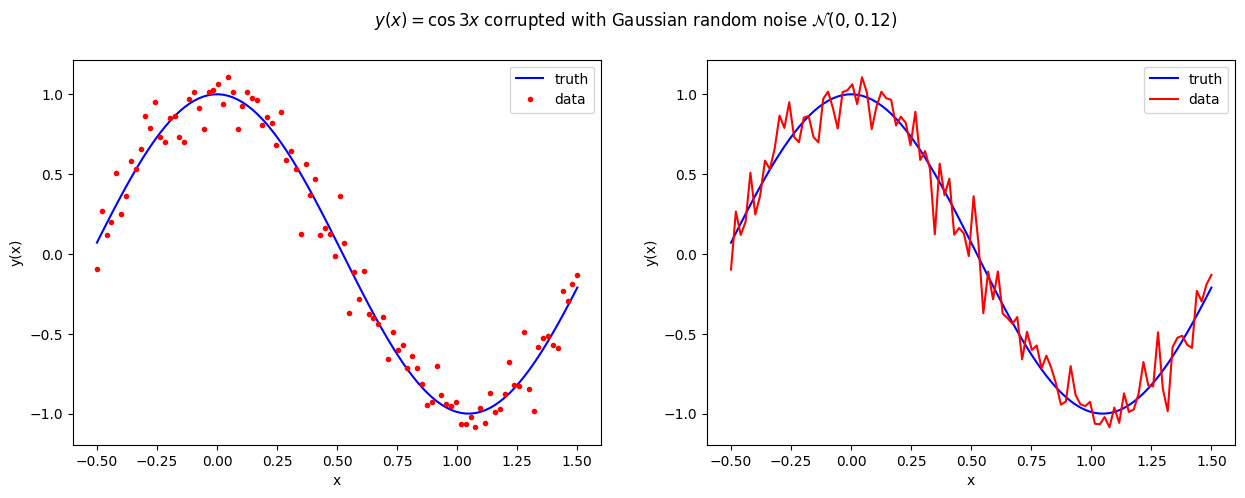

In [343]:
# Data
x = np.linspace(-0.5,1.5,100)
noise = np.random.normal(0,0.12,len(x))
yTrue = np.cos(3*x)
yMeas = yTrue + noise

# Least squares matrix
A1 = np.vstack([np.ones_like(x), x, 2*x**2-1, 4*x**3-3*x]).T
A2 = np.vstack([np.cos(x)**2, 1-2*np.sin(x), np.cos(3*x)*np.sin(x),(3-x)/(3+x)]).T
# Coefficients
c1 = np.linalg.pinv(A1) @ yMeas
c2 = np.linalg.pinv(A2) @ yMeas
# Fitted curves
yHat1 = A1 @ c1
yHat2 = A2 @ c2

# Plot
fig1, ax1 = plt.subplots(1,2, figsize=(15,5))

ax1[0].plot(x,yTrue,'b-',label='truth')
ax1[0].plot(x,yMeas,'r.',label='data')
ax1[0].set_xlabel('x')
ax1[0].set_ylabel('y(x)')
ax1[0].legend()

ax1[1].plot(x,yTrue,'b-',label='truth')
ax1[1].plot(x,yMeas,'r-',label='data')
ax1[1].set_xlabel('x')
ax1[1].set_ylabel('y(x)')
ax1[1].legend()

fig1.suptitle(r'$y(x) = \cos{3x}$ corrupted with Gaussian random noise $\mathcal{N}(0,0.12)$')
plt.show()

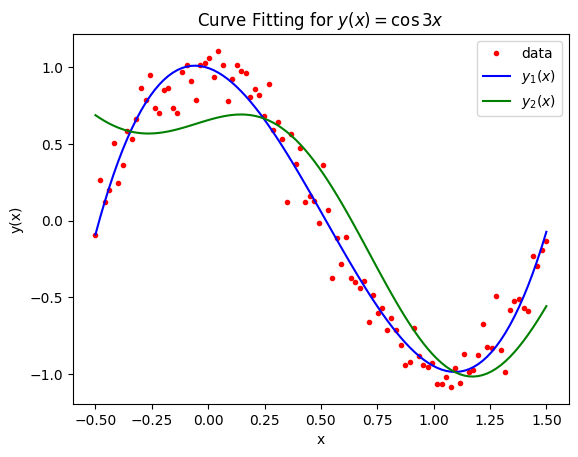

In [344]:
plt.plot(x,yMeas,'r.',label='data')
plt.plot(x,yHat1,'b-',label=r'$y_1(x)$')
plt.plot(x,yHat2,'g-',label=r'$y_2(x)$')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title(r'Curve Fitting for $y(x)=\cos{3x}$')
plt.legend()
plt.show()

In [345]:
L1_fit1 = np.linalg.norm(abs(yTrue - yHat1),1)
L1_fit2 = np.linalg.norm(abs(yTrue - yHat2),1)

L2_fit1 = np.linalg.norm(abs(yTrue - yHat1),2)
L2_fit2 = np.linalg.norm(abs(yTrue - yHat2),2)

Linf_fit1 = np.linalg.norm(abs(yTrue - yHat1),np.inf)
Linf_fit2 = np.linalg.norm(abs(yTrue - yHat2),np.inf)

print('L1 Norm')
print('==============')
print(f'y1: {L1_fit1}')
print(f'y2: {L1_fit2}\n')

print('L2 Norm')
print('==============')
print(f'y1: {L2_fit1}')
print(f'y2: {L2_fit2}\n')

print('L-inf Norm')
print('==============')
print(f'y1: {Linf_fit1}')
print(f'y2: {Linf_fit2}')

L1 Norm
y1: 5.084086527583292
y2: 22.43304977613388

L2 Norm
y1: 0.5886015457495378
y2: 2.540792689046713

L-inf Norm
y1: 0.1613325902337528
y2: 0.6167408851052455
